# Проект "Прогнозирование оттока клиентов в фитнес-центре 'Культурист-датасаентист'"

Цель проекта:

Подготовить план по удержанию клиентов

Задачи проекта:

•	научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;

•	сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;

•	проанализировать основные признаки, наиболее сильно влияющие на отток;

•	сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами


### Содержание:
1. Загрузка данных
2. Проведение EDA
3. Построение модели прогнозирования оттока клиентов
4. Кластеризация клиентов
5. Выводы по проекту

#### Шаг 1. Загрузка данных

In [2]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from plotly import graph_objects as go
from scipy import stats as st
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('C:/Users/darya/Downloads/gym_churn.csv')
df

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


В нашем распоряжении датасет, в котором 4000 строк и 14 колонок

Приведем названия колонок к одному регистру

In [23]:
df.columns = df.columns.str.lower()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
near_location                        4000 non-null int64
partner                              4000 non-null int64
promo_friends                        4000 non-null int64
phone                                4000 non-null int64
contract_period                      4000 non-null int64
group_visits                         4000 non-null int64
age                                  4000 non-null int64
avg_additional_charges_total         4000 non-null float64
month_to_end_contract                4000 non-null float64
lifetime                             4000 non-null int64
avg_class_frequency_total            4000 non-null float64
avg_class_frequency_current_month    4000 non-null float64
churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


#### Шаг 2. Проведение EDA

Посмотрим, есть ли в датасете пропуски

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
near_location                        4000 non-null int64
partner                              4000 non-null int64
promo_friends                        4000 non-null int64
phone                                4000 non-null int64
contract_period                      4000 non-null int64
group_visits                         4000 non-null int64
age                                  4000 non-null int64
avg_additional_charges_total         4000 non-null float64
month_to_end_contract                4000 non-null float64
lifetime                             4000 non-null int64
avg_class_frequency_total            4000 non-null float64
avg_class_frequency_current_month    4000 non-null float64
churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


Мы видим, что пропусков нет

Изучим средние значения и отклонения

In [26]:
for column in df:
    print(column)
    print(df[column].describe())

gender
count    4000.000000
mean        0.510250
std         0.499957
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: gender, dtype: float64
near_location
count    4000.000000
mean        0.845250
std         0.361711
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: near_location, dtype: float64
partner
count    4000.000000
mean        0.486750
std         0.499887
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: partner, dtype: float64
promo_friends
count    4000.000000
mean        0.308500
std         0.461932
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: promo_friends, dtype: float64
phone
count    4000.000000
mean        0.903500
std         0.295313
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
m

Очевидно, не у всех полей мы можем проанализировать стандартное отклонение и среднее: у нас есть и бинарные поля со значениями 0 и 1. 
<b>Contract_period</b> - здесь у нас среднее примерно равно стандартному отклонению. 50 персентиль равен 1 месяцу, значит, большинство пользователей имеют абонементы всего на месяц. На абонементы от 6 месяцев и выше приходится всего 25% пользователей. 

<b>Group_visits</b> - это бинарное поле, однако, судя по среднему 0,4 мы можем сказать, что все-таки меньшая часть клиентов посещает групповые занятия

<b>Age</b> - средний возраст нашего клиента  - 29 лет. Максимальный - 41 год. Видимо, люди старшего возраста не являются целевым сегментом фитнес-клуба. Так же, как и люди до 18 лет (вероятно, клуб продает абонементы только людям с 18 лет)

<b>Avg_additional_charges_total</b> - суммарная выручка от других услуг фитнес-центра. Среднее и медианное значение отличаются всего на 10 единиц, значит, выбросов у нас, если они и есть, то их не очень много. В среднем помимо оплаты абонемента клиенты тратят 146 денежных единиц, максимальная трата - 552

<b>Month_to_end_contract</b> - здесь мы видим, что у 50% пользователей абонемент окончится через месяц. Это не очень хорошие знак, значит, их можно начинать "прогревать" на следующий абонемент, иначе через месяц клуб покинет половина клиентов. 

<b>Lifetime</b> - мы видим, что 75% клиентов первый раз воспользовались услугами фитнес-центра 6 месяцев назад. Это может означать, что или мы привлекли большую часть клиентов только 6 месяцев назад

<b>Avg_class_frequency_total</b> и <b>Avg_class_frequency_current_month</b> рассмотрим вместе. Мы видим, что у  50% пользователей снижается среднее количество посещений, если сравнивать весь период и последний месяц - 1.8 против 1.7

<b>Churn</b> - среднее значение 0.2, это значит, у нас в датасете больше 0, чем 1, а это в свою очередь означает, что в этом месяце нас покинула большая часть клиентов

Хотелось бы обратить внимание, например, на переменные Age и Avg_additional_charges_total. У них очень разные по величине стандартные отклонения.
Это говорит о том, что переменные нужно стандартизировать перед обучением. Для логистической регрессии и дерева это не обязательно, но дальше мы все равно стандартизируем данные. 

Посмотрим на средние значения признаков в двух группах - те, кто счернился, и те, кто остался

In [27]:
df_grouped = df.groupby('churn').agg('mean')
df_grouped

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Мы видим, что практически во всех колонках средние значения выше у тех, кто не счернился. 

Построим столбчатые гистограммы и распределения признаков для тех, кто ушел, и тех, кто остался

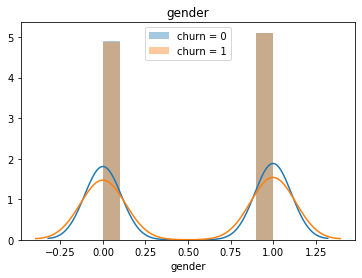

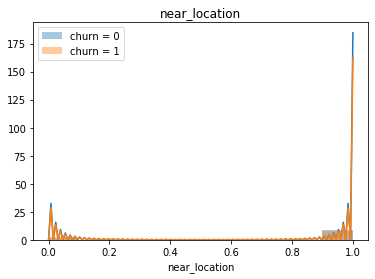

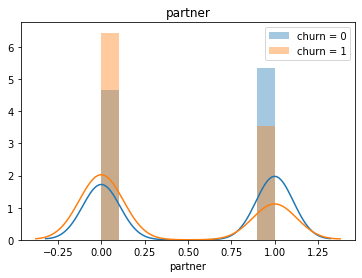

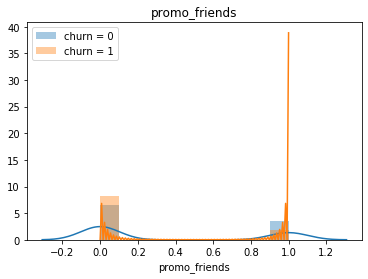

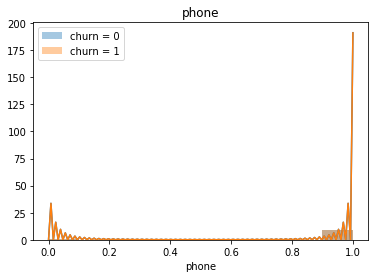

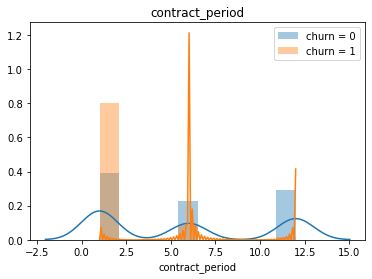

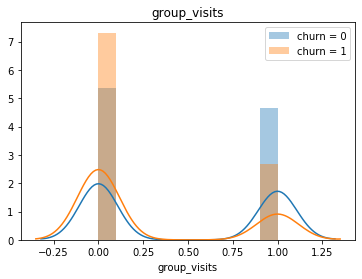

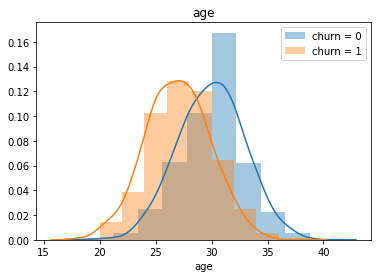

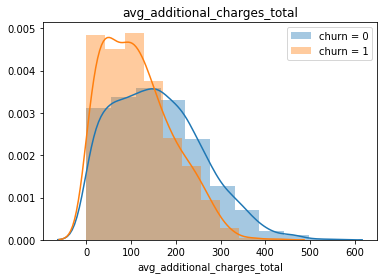

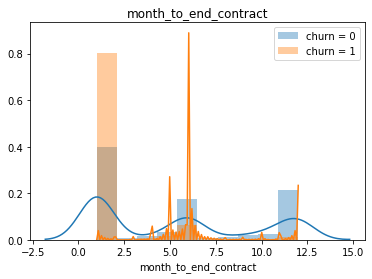

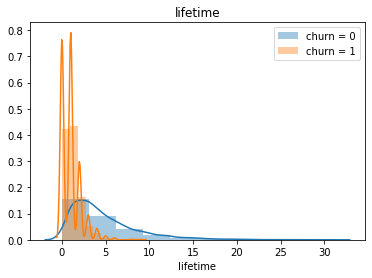

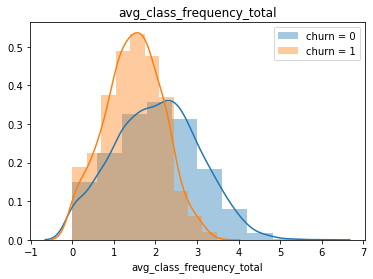

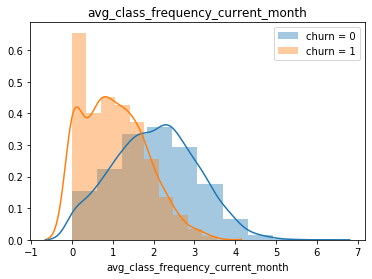

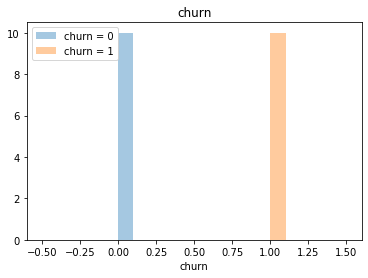

In [28]:
def feat_hist(dataframe, column_to_group, column_to_plot):
 
    for c in column_to_plot:
        for cl in dataframe[column_to_group].unique():
            sns.distplot(dataframe[dataframe[column_to_group]==cl][c], 
                         label='{} = {}'.format(column_to_group, str(cl)), bins = 10)
        plt.title(c)
        plt.legend()
        plt.show()
 
feat_hist(df, 'churn', df.columns)

По этим графикам мы видим, что:

- большинство из группы churn = 0 живут рядом с фитнес-клубом. Им удобно туда ходить, и они продолжают это делать
- большинство тех, кто остался, - сотрудник компании-партнера клуба. Видимо, скидка в клуб от компании - большая мотивация его посещать
- очевидно, большинство счернившихся имеют остаток от текущего абонемента до месяца, однако, есть и те, у кого еще в наличии абонемент на 6 месяцев, но он в клуб уже не ходит
- те, кто не ушел от нас, посещали групповые чаще, чем кто ушел
- у тех, кто счернился, более короткий лайфтайм

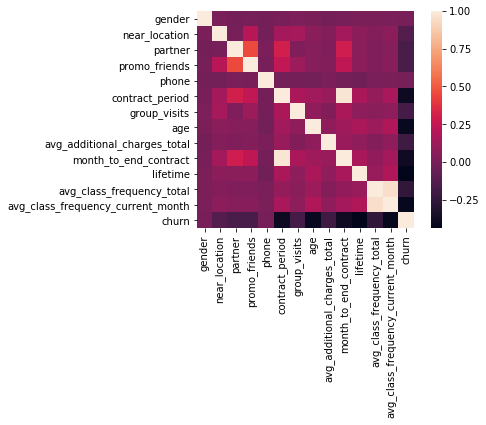

In [29]:
corr_m = df.corr()
sns.heatmap(corr_m, square = True)

Мы видим, что у нас сильнейшая корреляция у колонок contract_period и month_to_end_contract. В дальнейшем анализе нам нужно будет использовать что-то одно из них.

Также у нас сильно коррелируют между собой признаки avg_class_frequency_total и avg_class_frequency_current_month

Удалим коррелирующиеся столбцы

In [30]:
df = df.drop(['month_to_end_contract', 'avg_class_frequency_current_month'], axis = 1)

Таким образом, мы выяснили, что в нашем датасете присутствуют коррелирующие между собой значения. Скорее всего, в дальнейшем нам нужно будет снизить размерность датасета, чтобы модель показывала адеватные значения. 

Мы посмотрели на описательные статистики каждой колонки в датасете и выснили, что большинство пользователей имеют абонементы всего на месяц. На абонементы от 6 месяцев и выше приходится всего 25% пользователей. Меньшая часть клиентов посещает групповые занятия. Средний возраст нашего клиента  - 29 лет. Максимальный - 41 год. В среднем помимо оплаты абонемента клиенты тратят 146 денежных единиц, максимальная трата - 552. У 50% пользователей абонемент окончится через месяц.  75% клиентов первый раз воспользовались услугами фитнес-центра 6 месяцев назад. Это может означать, что или мы привлекли большую часть клиентов только 6 месяцев назад. У  50% пользователей снижается среднее количество посещений, если сравнивать весь период и последний месяц - 1.8 против 1.7. Большинство из группы churn = 0 живут рядом с фитнес-клубом. Им удобно туда ходить, и они продолжают это делать
Большинство тех, кто остался, - сотрудник компании-партнера клуба. Видимо, скидка в клуб от компании - большая мотивация его посещать . Очевидно, большинство счернившихся имеют остаток от текущего абонемента до месяца, однако, есть и те, у кого еще в наличии абонемент на 6 месяцев, но он в клуб уже не ходит. Те, кто не ушел от нас, посещали групповые чаще, чем кто ушел. У тех, кто счернился, более короткий лайфтайм

#### Шаг 3. Построение модели прогнозирования оттока клиентов

В этом шаге мы построим модель прогнозирования оттока клиентов с помощью двух алгоритмов: логистическая регрессия и случайный лес. 

In [31]:
# определим функцию, которая будет выводить наши метрики
def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

 
    # разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = df.drop('churn', axis = 1)
y = df['churn']
 
    # разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
 
    # обучите StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)
 
    # Преобразуйте обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)
 
    # зададим алгоритм для модели логистической регрессии
lr_model = LogisticRegression(random_state=0)
    # обучим модель
lr_model.fit(X_train_st, y_train)
    # воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:, 1]
    # выведим все метрики
print_all_metrics(
        y_test,
        lr_predictions,
        lr_probabilities,
        title='Метрики для модели логистической регрессии:',
    )
 
 
    # зададим алгоритм для новой модели на основе алгоритма решающего дерева
tree_model = DecisionTreeClassifier(random_state=0)
    # обучим модель решающего дерева
tree_model.fit(X_train_st, y_train)
    # воспользуемся уже обученной моделью, чтобы сделать прогнозы
tree_predictions = tree_model.predict(X_test_st)
tree_probabilities = tree_model.predict_proba(X_test_st)[:, 1]
    # выведем все метрики
print_all_metrics(
        y_test,
        tree_predictions,
        tree_probabilities,
        title='Метрики для модели дерева решений:',
    )
 
 
    # зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
    # обучим модель случайного леса
rf_model.fit(X_train_st, y_train)
    # воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:, 1]
    # выведем все метрики
print_all_metrics(
        y_test,
        rf_predictions,
        rf_probabilities,
        title='Метрики для модели случайного леса:',
    )
 
 
    # зададим алгоритм для новой модели на основе алгоритма градиентного бустинга
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=0)
    # обучим модель градиентного бустинга
gb_model.fit(X_train_st, y_train)
    # воспользуемся уже обученной моделью, чтобы сделать прогнозы
gb_predictions = gb_model.predict(X_test_st)
gb_probabilities = gb_model.predict_proba(X_test_st)[:, 1]
    # выведем все метрики
print_all_metrics(
        y_test,
        gb_predictions,
        gb_probabilities,
        title='Метрики для модели градиентного бустинга:',
    )

Метрики для модели логистической регрессии:
	Accuracy: 0.90
	Precision: 0.79
	Recall: 0.81
	F1: 0.80
	ROC_AUC: 0.95
Метрики для модели дерева решений:
	Accuracy: 0.83
	Precision: 0.64
	Recall: 0.71
	F1: 0.67
	ROC_AUC: 0.79
Метрики для модели случайного леса:
	Accuracy: 0.89
	Precision: 0.79
	Recall: 0.76
	F1: 0.77
	ROC_AUC: 0.94
Метрики для модели градиентного бустинга:
	Accuracy: 0.90
	Precision: 0.80
	Recall: 0.79
	F1: 0.79
	ROC_AUC: 0.95


Таким образом, мы видим, что лучше всего отработала модель градиентного бустинга. Однако так как в самом задании нам необходимо выбрать между логистической регрессией и случайным лесом, то лучше из этих двух моделей отрабатывает модель логистической регрессии

#### Шаг 4. Кластеризация клиентов

Стандартизируем данные

In [32]:
scaler = StandardScaler()

Jбучаем нормализатор и преобразуем набор данных

In [33]:
x_sc = scaler.fit_transform(df.drop(columns = ['churn']))

In [34]:
linked = linkage(x_sc, method = 'ward') 

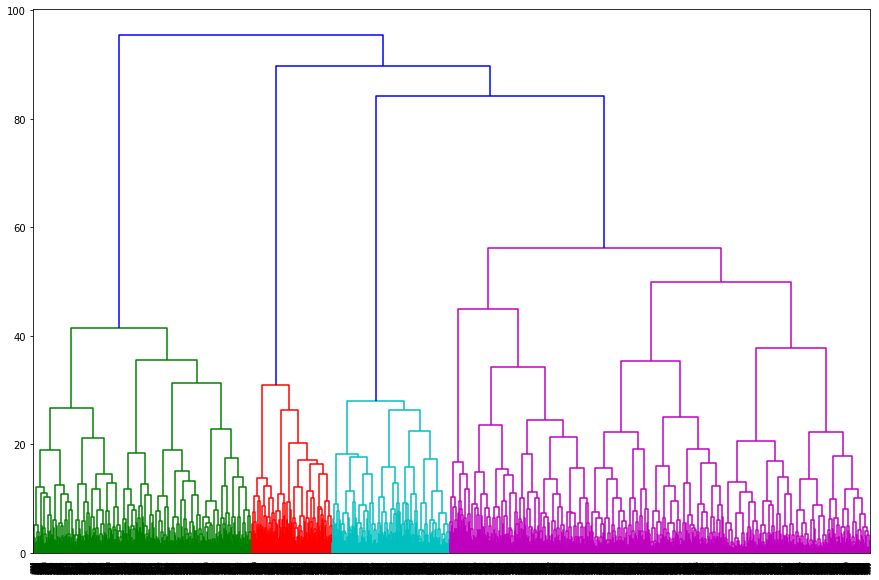

In [35]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show() 


На основе полученной дендрограммы мы можем выделить 4 кластера

In [36]:
# задаём модель k_means с числом кластеров 4
km = KMeans(n_clusters=4, random_state=0)
# прогнозируем кластеры для наблюдений
labels = km.fit_predict(x_sc)

# сохраняем метки кластера в поле нашего датасета
df['cluster_km'] = labels

# выводим статистику по средним значениям наших признаков по кластеру
data_means = df.groupby(['cluster_km']).mean()
data_means

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total,churn
cluster_km,,,,,,,,,,,,
0,0.524599,1.000000,0.176893,0.061913,1.0,3.035931,0.394140,28.974019,143.390526,3.334439,1.848948,0.332781
1,0.490354,0.995981,0.941318,0.772508,1.0,7.787781,0.513666,29.663183,157.200280,4.524920,1.979426,0.106109
2,0.499109,0.000000,0.488414,0.076649,1.0,3.032086,0.235294,28.721925,137.540009,3.060606,1.770413,0.399287
3,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,3.940415,1.854211,0.266839


Что мы видим? У нас образовалось 4  кластера людей с такими характеристиками.

Воспользуемся БКГ-матрицей, чтобы дать кластерам имена

Кластер 0 - "Трудные дети":

- Чуть больше людей с полом 1
- Живут дальше остальных кластеров от фитнес-клуба
- почти половина пришла от партнера 
- меньшая часть пришла промокод от знакомых, когда первый раз пришли в клуб
- длительность текущего абонемента 4,7 месяцев
- меньшая часть людей посещала групповые занятия
- средний возраст - 29 лет
- суммарная выручка от других услуг фитнес-центра - 144
- лайфтайм - 3,9
- средняя частота посещений в неделю - 1,8

Кластер 1 - "Собаки:

- Чуть больше людей с полом 0
- Живут близко с фитнес-клубом
- почти никто не пришел от парнтера
- никто не использовал  промокод от знакомых, когда первый раз пришли в клуб
- длительность текущего абонемента 1,9 месяцев
- меньшая часть людей посещала групповые занятия
- средний возраст - 27 лет
- суммарная выручка от других услуг фитнес-центра - 120 (меньше всех остальных кластеров)
- лайфтайм - 2 (самый низкий)
- средняя частота посещений в неделю - 1,5 (самая низкая)

Кластер 2 - "Звезды":

- Чуть больше людей с полом 0
- Живут дальше остальных кластеров от фитнес-клуба, но большинство все еще в том же районе
- меньшинство пришло от партнера
- очень мало людей, кто использовал промокод от знакомого, счет на единицы
- длительность текущего абонемента 5,9 месяца
- большая половина посещали групповые занятия
- средний возраст - 30 лет
- суммарная выручка от других услуг фитнес-центра - 173 (больше остальных кластеров)
- лайфтайм - 5 (самый высокий)
- средняя частота посещений в неделю - 2,2 (самая высокая среди кластеров)

Кластер 3 - "Дойные коровы":

- Чуть больше людей с полом 1
- Живут относительно близко с фитнес-клубом
- большинство пришло от партнера (больше остальных кластеров)
- все пришедшие использовали промокод от знакомых, когда первый раз пришли в клуб
- длительность текущего абонемента 6,5 месяцев
- чуть больше половины людей посещали групповые занятия
- средний возраст - 29 лет
- суммарная выручка от других услуг фитнес-центра - 151
- лайфтайм - 4
- средняя частота посещений в неделю -  1,9

Отрисуем графики, чтобы посмотреть распределение

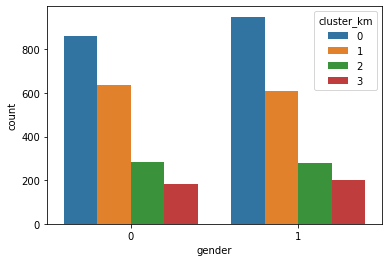

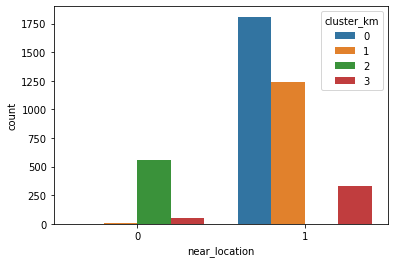

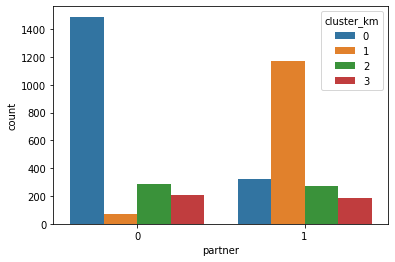

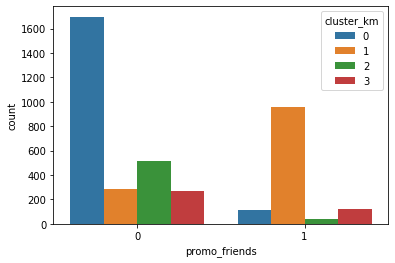

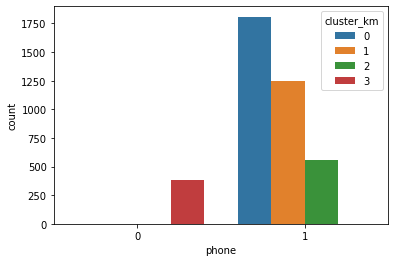

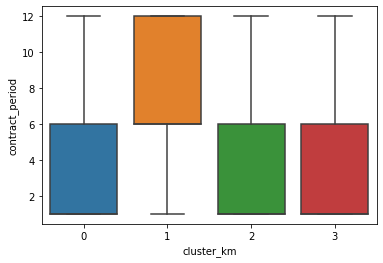

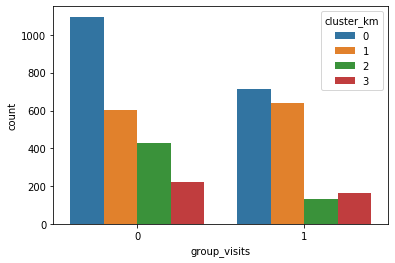

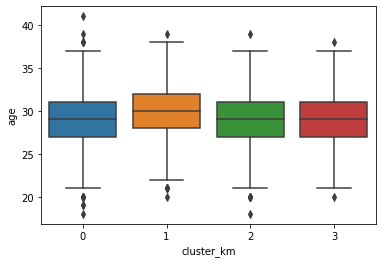

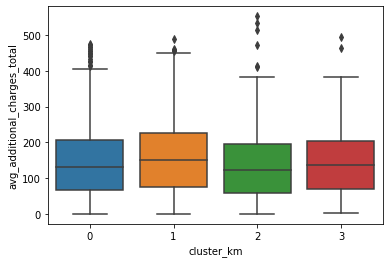

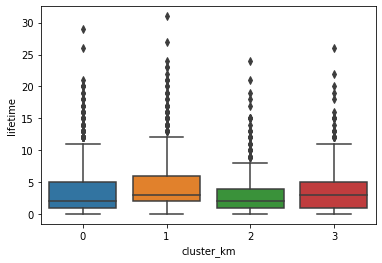

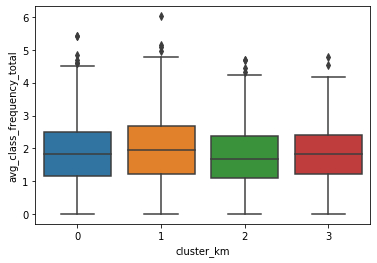

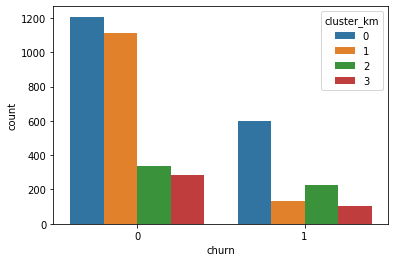

In [37]:
for i in data_means.columns:
    plt.figure()

    if df[i].nunique() > 2:
        sns.boxplot(x = 'cluster_km', y = i, data=df)
    else:
        sns.countplot(x = i, hue = 'cluster_km', data=df)
        

Судя по этим графикам, мы можем сделать несколько интересных выводов:

- больше всего людей из кластера 1
- среди тех, кто живет не рядом с фитнес-клубом, больше всего людей из кластера 1, в группе "живут рядом" больше всего кластера 2
- больше всего от партнера пришли из кластера 3, больше всего "самостоятельных" - из кластера 1
- меньше всего от друзей пришли из кластеров 1 и 2, больше всего - из кластера 3
- кластер 1 чаще всего имеет абонемент на 1 месяц. У кластеров 2 и 3 чаще всего встречается абонемент на 12 месяцев
- кластер 1 почти не посещает групповые занятия. Чаще всего их посещает кластер 2

Что касается доли оттока, больше всего "утекает" пользователей из кластера 1. Это неудивительно, потому что и выше мы писали, что они не посещают групповые, меньше всех денег тратят на услуги фитнес-клуба (кроме абонемента), имеют самые короткие абонементы. В то же время, кластер "Звезды" имеют самый низкий показатель оттока, и это очень хорошо, потому что именно этот кластер приносит нам больше всех денег. 

#### Шаг 5. Общие выводы

Таким образом, мы провели анализ клиентов фитнес-клуба с помощью алгоритмом машинного обучения. 
Что мы выяснили о клиентах в целом:
- большинство пользователей имеют абонементы на месяц. 
- На абонементы от 6 месяцев и выше приходится всего 25% пользователей.
- Средний возраст нашего клиента  - 29 лет. Максимальный - 41 год.
- В среднем помимо оплаты абонемента клиенты тратят 146 денежных единиц, максимальная трата - 552. 
- У 50% пользователей абонемент окончится через месяц.  
- 75% клиентов первый раз воспользовались услугами фитнес-центра 6 месяцев назад. 
- Большинство из группы churn = 0 живут рядом с фитнес-клубом. Им удобно туда ходить, и они продолжают это делать
- Большинство тех, кто остался, - сотрудник компании-партнера клуба. Видимо, скидка в клуб от компании - большая мотивация его посещать
- Те, кто не ушел от нас, посещали групповые чаще, чем кто ушел. У тех, кто счернился, более короткий лайфтайм

Мы провели кластерный анализ клиентов и выяснили, что у нас есть 4 кластера клиентов. Для удобства мы назвали их так же, как называются сегменты рынка в БКГ-матрице:

"Трудные дети" живут дальше остальных кластеров от фитнес-клуба, приходят от партнера, имеют абонемент еще на 4,7 месяцев, не посещают групповые занятия, живут с нами почти 4 месяца и ходят в зал 1,8 раз в неделю. Они же оттекают значительнее всего

"Собаки живут близко с фитнес-клубом, почти никто не пришел от парнтера, никто не использовал  промокод от знакомых, когда первый раз пришли в клуб, имеют абонемент на 1,9 месяцев, не посещают групповые занятия, меньше всех тратят на услуги в фитнес-центре, лайфтайм - 2 (самый низкий), средняя частота посещений в неделю - 1,5 (самая низкая)

"Звезды" живут дальше остальных кластеров от фитнес-клуба, но большинство все еще в том же районе, меньшинство пришло от партнера, очень мало людей, кто использовал промокод от знакомого, счет на единицы, длительность текущего абонемента 5,9 месяца, большая половина посещали групповые занятия, суммарная выручка от других услуг фитнес-центра - 173 (больше остальных кластеров), лайфтайм - 5 (самый высокий), средняя частота посещений в неделю - 2,2 (самая высокая среди кластеров)

"Дойные коровы" живут относительно близко с фитнес-клубом, большинство пришло от партнера (больше остальных кластеров), все пришедшие использовали промокод от знакомых, когда первый раз пришли в клуб, длительность текущего абонемента 6,5 месяцев, чуть больше половины людей посещали групповые занятия, лайфтайм - 4, средняя частота посещений в неделю -  1,9

Таким образом, на основании данных выводов мы можем дать следующие рекомендации:

- Партнерская программа и программа "приведи друга" хоть и не оказывает большого влияния на "звезд", но зато сильно мотивирует "дойных коров". Мы рекомендуем продолжать <b>развивать партнерскую сеть через компании-партнеры и использовать этот канал привлечения</b>
- Оба приоритетных кластера активно ходят на групповые занятия - это может быть конкурентным преимуществом. Рекомендуем наращивать количество таких занятий
- Обоим приоритетным сегментам не столь важно, чтобы фитнес-клуб находился вблизи их дома. Возможно, стоит <b>расширять таргетированную рекламу и на другие районы</b>
- <b>Продвигать групповые занятия в соцсетях: инстаграм, вк</b>